##### Code written by Nathan Thomas, November 2019

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
import seaborn as sns
import tweepy
from tweepy import OAuthHandler
import re as re
import json
from textblob import TextBlob



consumer_key = "aSoTtfzzvDgPJs76Ev8lFt3Z2"
consumer_secret = "xz1m3I44lMUE7I5O7Cagfg1bDzxVHOfzWLHN0aSrpmFmcR8hvH"

access_token = "713195503-bM7wSMQzXAWAVStGug6CgegNRt7cvaklRVTqwgJx"
access_secret = "JSMl1qJpf9rnZ2WOPAqlzt4LZrQW7p7PqMeiHSPOKXR2v"

## Data Retrieval

In [3]:
# Authenticate credentials
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth)

# Retrieve tweets from Donald Trump's account using the API
dtweets = tweepy.Cursor(api.user_timeline, id="realDonaldTrump", include_rts=True, count=200, tweet_mode="extended")

# Create empty DataFrame for tweets to go into
df = pd.DataFrame(columns=["Date Created","RT Count", "Tweet"])

# Append tweets to DataFrame
i=0
for tweet in dtweets.items(3000):
    df.loc[i, "Date Created"] = tweet.created_at
    df.loc[i, "RT Count"] = tweet.retweet_count
    df.loc[i, "Tweet"] = tweet.full_text
    
        i+=1
    if i == 3000:
        break
    else:
        pass

,Date Created,RT Count,Tweet
0,2020-01-23 22:21:22,5025,True! https://t.co/OPTBdNOQrD


## Cleaning the Tweets

In [3]:
def clean_tweet(tweet):
    return ' '.join(re.sub('(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)', ' ', tweet).split())

df["Clean Tweet"] = df['Tweet'].apply(lambda x: clean_tweet(x))

i=0
for tweet in dtweets.items(3000):
    clean_tweet(tweet.full_text)
     
    i+=1
    if i == 3000:
        break
    else:
        pass

    
    
df.tail()

,Date Created,RT Count,Tweet,Clean Tweet
2995,2019-07-28 10:56:02,28764,"“If it weren’t for Donald Trump, we would neve...",If it weren t for Donald Trump we would never ...
2996,2019-07-28 04:17:44,16400,https://t.co/9jgdUE5BF8,
2997,2019-07-28 04:02:25,16606,The Democrats are still doing the Russians dir...,The Democrats are still doing the Russians dir...
2998,2019-07-28 03:49:34,20411,"The real Collusion, the Conspiracy, the Crime,...",The real Collusion the Conspiracy the Crime wa...
2999,2019-07-28 03:35:47,25167,So sad that Elijah Cummings has been able to d...,So sad that Elijah Cummings has been able to d...


## Sentiment Analysis

In [4]:
def analyze_sentiment(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity ==0:
        return 'Neutral'
    else:
        return 'Negative'

# Apply Textblob sentiment anaylsis to the tweet
df["Sentiment"] = df['Clean Tweet'].apply(lambda x: analyze_sentiment(x))

i=0
for tweet in dtweets.items(3000):
    analyze_sentiment(tweet.full_text)
     
    i+=1
    if i == 3000:
        break
    else:
        pass

df.tail()

,Date Created,RT Count,Tweet,Clean Tweet,Sentiment
2995,2019-07-28 10:56:02,28764,"“If it weren’t for Donald Trump, we would neve...",If it weren t for Donald Trump we would never ...,Neutral
2996,2019-07-28 04:17:44,16400,https://t.co/9jgdUE5BF8,,Neutral
2997,2019-07-28 04:02:25,16606,The Democrats are still doing the Russians dir...,The Democrats are still doing the Russians dir...,Negative
2998,2019-07-28 03:49:34,20411,"The real Collusion, the Conspiracy, the Crime,...",The real Collusion the Conspiracy the Crime wa...,Positive
2999,2019-07-28 03:35:47,25167,So sad that Elijah Cummings has been able to d...,So sad that Elijah Cummings has been able to d...,Negative


## Data visualization

#### 1. Distribution of sentiment

Text(0, 0.5, 'Count')

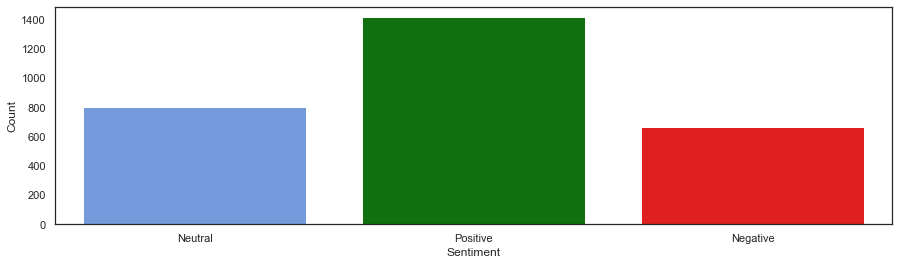

In [34]:
sns.set(style="white")
plt.figure(figsize=(15,4))
colors = ["#6495ed", "green", "red"]
ax = sns.countplot(x="Sentiment", data=df_1, palette = colors)
plt.ylabel("Count")

#### 2. Historical Tweet Frequency

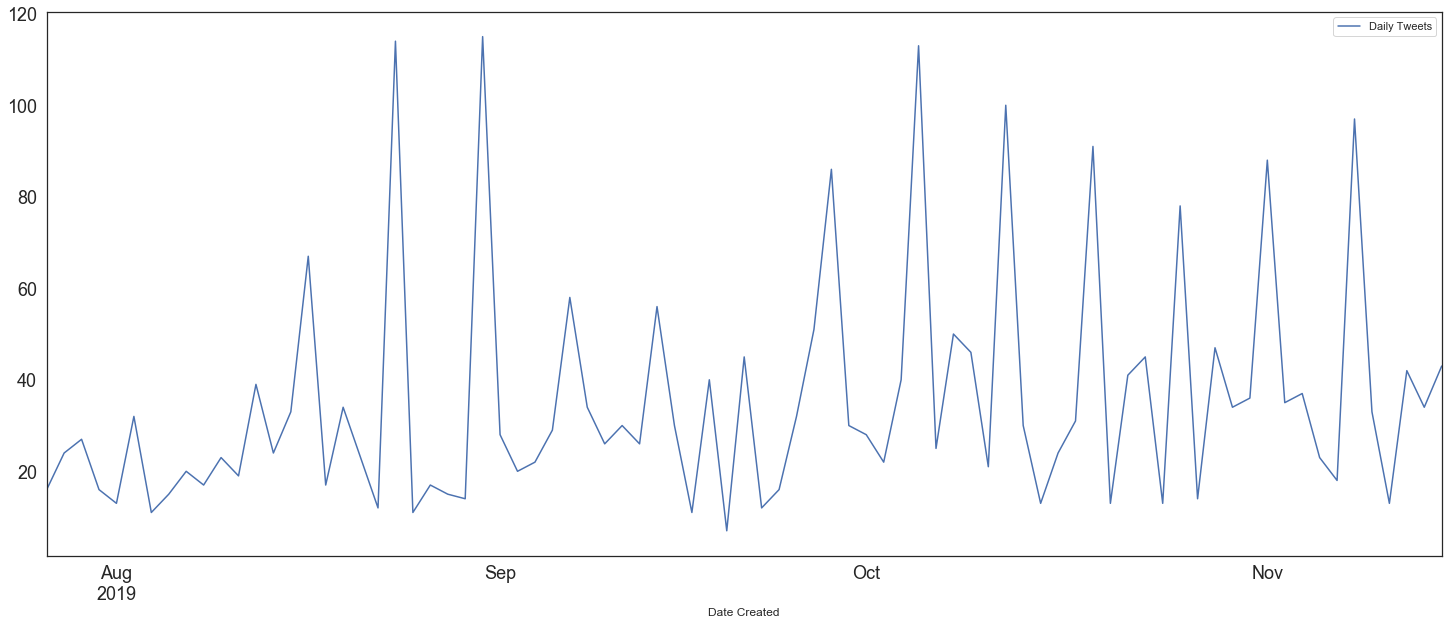

In [58]:
df_2.plot(y="Tweet", figsize=(25,10), fontsize=18, label = "Daily Tweets")

months = mdates.MonthLocator()
fmt = mdates.DateFormatter("%B %Y")
ax.xaxis.set_major_formatter(fmt)
ax.xaxis.set_major_locator(months)

#### 3. Sentiment Scores & Returns

In [9]:
df = pd.read_excel("grouped3.xlsx")
df.head(10)

,Date Created,Sentiment Score,SPX Returns (lhs),Trump Tweets Index (rhs)
0,2019-07-29,0.8,-0.001616,-0.001293
1,2019-07-30,-0.4,-0.002579,0.001031
2,2019-07-31,-0.2,-0.010886,0.002177
3,2019-08-01,0.7,-0.008999,-0.006299
4,2019-08-02,-2.6,-0.007283,0.018935
5,2019-08-05,0.9,-0.029778,-0.026800
6,2019-08-06,3.0,0.013017,0.039051
7,2019-08-07,1.8,0.000767,0.001380
8,2019-08-08,0.8,0.018762,0.015010
9,2019-08-09,3.1,-0.006617,-0.020511
